In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Imagen 3 Image Editing

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fimagen3_editing.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/imagen3_editing.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_editing.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| Author |
| --- |
| [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Imagen 3

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with Imagen 3 and modify existing images with mask-based editing and mask-free editing in the following modes:

- Inpainting
- Product background editing
- Outpainting
- Mask-free

## Get started


### Install Google Gen AI SDK for Python


In [1]:
%pip install --upgrade --quiet google-genai

Note: you may need to restart the kernel to use updated packages.


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [2]:
from google import genai
from google.genai.types import (
    EditImageConfig,
    GenerateImagesConfig,
    Image,
    MaskReferenceConfig,
    MaskReferenceImage,
    RawReferenceImage,
)

### Set Google Cloud project information and create client
To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [4]:
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

In [5]:
os.environ.get("GOOGLE_CLOUD_PROJECT")

'qwiklabs-gcp-03-cded6459eba5'

In [6]:
os.environ.get("GOOGLE_CLOUD_REGION")

'us-central1'

In [7]:
os.environ

environ{'SHELL': '/bin/bash',
        'CONDA_EXE': '/opt/conda/bin/conda',
        '_CE_M': '',
        'VERTEX_PRODUCT': 'WORKBENCH_INSTANCE',
        'GRPC_FORK_SUPPORT_ENABLED': '0',
        'DL_ANACONDA_HOME': '/opt/conda',
        'FRAMEWORK_FILE_PATH': '/opt/deeplearning/metadata/framework',
        'GOOGLE_CLOUD_PROJECT': 'qwiklabs-gcp-03-cded6459eba5',
        'POST_STARTUP_SCRIPT_PATH': '/opt/c2d/post_start.sh',
        'DL_PATH_DEPS': '/opt/deeplearning/deps',
        'DL_BIN_PATH': '/opt/deeplearning/bin',
        'XML_CATALOG_FILES': 'file:///opt/conda/etc/xml/catalog file:///etc/xml/catalog',
        'KERNEL_LAUNCH_TIMEOUT': '598',
        'BINARIES_PATH': '/opt/deeplearning/binaries',
        'PWD': '/home/jupyter/generative-ai/vision/getting-started',
        'LOGNAME': 'jupyter',
        'CONDA_PREFIX': '/opt/conda',
        'JPY_SESSION_NAME': '/home/jupyter/generative-ai/vision/getting-started/imagen3_editing.ipynb',
        'TENSORBOARD_PROXY_URL': '/proxy/%PORT%/',


### Define helper functions

In [8]:
import io
import urllib

from PIL import Image as PIL_Image
import matplotlib.pyplot as plt


# Gets the image bytes from a PIL Image object.
def get_bytes_from_pil(image: PIL_Image) -> bytes:
    # create in-memory binary stream io.BytesIO()
    byte_io_png = io.BytesIO()
    # save input 'image' to byte stream 'byte_io_png' using PNG format (common way to serialise img)
    image.save(byte_io_png, "PNG")
    # getvalue() retrieves 'sequence of bytes' from the stream
    return byte_io_png.getvalue()



# Pads an image for outpainting.
def pad_to_target_size(
    source_image,
    target_size=(1536, 1536),
    mode="RGB",
    # offset_ratio usu from -0.5 to 0.5
    # to offset 'inserted image' from the centre position (0)
    # to move img within padded canvas
    vertical_offset_ratio=0,
    horizontal_offset_ratio=0,
    # 255 for white in RGB -> fill padded area for 'masking'
    fill_val=255,
):
    orig_image_size_w, orig_image_size_h = source_image.size
    target_size_w, target_size_h = target_size

    # find insert_pt (x,y) coords to place ur source img
    #      in the centre of the target_size canvas
    # insert_pt_x = top-left corner 'x' coord
    # AND
    # offset_ratio adjusts the centre position - how????
    # eg horizontal_offset_ratio = 0.1, target_size_w/h = 1536
    #        adjustment = horizontal_offset_ratio * target_size_w
    #                   = 153.6 px TO THE RIGHT of 'target_centre_X'
    #    horizontal_offset_ratio = -0.1 to SHIFT LEFT
    insert_pt_x = (target_size_w - orig_image_size_w) // 2 + int(
        horizontal_offset_ratio * target_size_w
    )
    # y or h is calculated from 0 onwards, from bottom to top, or top to btm???? 
    #        TOP (0) TO BTM (ht)
    # insert_pt_y = top-left corner 'y' coord to place ur source img
    #               in the centre of the target_size canvas
    # AND
    # how is the offset calculated for ht????
    #        vertical_offset_ratio = POS or 0.1 -> increase insert_pt_y -> shift img down
    #                              = 0          -> no shift; still center the img
    #                              = NEG        -> decrease insert_pt_y -> shift img up
    insert_pt_y = (target_size_h - orig_image_size_h) // 2 + int(
        vertical_offset_ratio * target_size_h
    )
    
    
    # min - ensure img is not pased outside target boundaries - how????
    #       target_size_w - orig_image_size_w = max valid starting X coord (Left to Rt) for top-left corner of source_image
    #                                           if source_img left top-corner is @ this X-coord, source_img right edge will touch target canvas' right edge (target_size_w)
    insert_pt_x = min(insert_pt_x, target_size_w - orig_image_size_w)
    insert_pt_y = min(insert_pt_y, target_size_h - orig_image_size_h)

    
    if mode == "RGB":
        # create new/blank PIL_Image canvas
        source_image_padded = PIL_Image.new(
            mode, # RGB mode
            target_size, 
            color=(fill_val, fill_val, fill_val) # 1 fill_val value used across all R-G-B colour channels, to achieve the right RGB intensity
        )
    elif mode == "L":
        source_image_padded = PIL_Image.new(mode,  # L mode
                                            target_size, 
                                            color=(fill_val)) # 1 fill_val value (i.e. black to grey to white intensity)
    else:
        raise ValueError("source image mode must be RGB or L.")

    # PASTE source_image ONTO the new/BLANK source_image_padded canvas
    # the (insert_pt_x, insert_pt_y) coords need to be the 'centre' where the paste is situated????
    source_image_padded.paste(source_image, (insert_pt_x, insert_pt_y))
    return source_image_padded




# Pads and resizes image and mask to the same target size.
def pad_image_and_mask(
    image_vertex: PIL_Image,
    mask_vertex: PIL_Image,
    target_size,
    vertical_offset_ratio,
    horizontal_offset_ratio,
):
    # what is thumnail?
    #      method from pillow/PIL library to resize img
    #      thumbnail resizes img "in-place"
    # what does it do?
    #      set max dims - target_size
    #                     either 1 value (target_size) or a tuple (target_size_w, target_size_ht)
    # techincally thumbnail able to change aspect ratio? or need to use smth else?
    #      thumbnail ALWAYS PRESERVES ORIGINAL ASPECT RATIO
    #                determines ratio of orig size vs tgt size
    #                then apply min(orig_aspect_ratio, tgt_aspect_ratio) -> so orig_img fits inside tgt_size canvas
    #                eg orig img 2000x1000 -> aspect ratio 2:1
    #                   tgt_size 500x500   -> 1:1
    #                   scale down img by factor of 4 cuz 2000/500 = 4
    #                              img becomes (2000/4, 1000/4) = (500, 250) to keep the orig img aspect ratio 2:1
    #     thumbnail CANNOT CHANGE ASPECT RATIO
    #     to change aspect ratio, use
    #        .resize(tgt_size)
    image_vertex.thumbnail(target_size)
    mask_vertex.thumbnail(target_size)

    
    # reuse 'pad_to_target_size' defined above
    # resize orig img AND mask img
    image_vertex = pad_to_target_size(
        image_vertex,
        target_size=target_size,
        mode="RGB",
        vertical_offset_ratio=vertical_offset_ratio,
        horizontal_offset_ratio=horizontal_offset_ratio,
        
        # orig img - aft resizing, pad/fill with black cuz currently nothing in those pixel locations
        #            those locations are meant for model to fill in during outpainting (by white mask later)
        fill_val=0,
    )
    mask_vertex = pad_to_target_size(
        mask_vertex,
        target_size=target_size,
        mode="L",
        vertical_offset_ratio=vertical_offset_ratio,
        horizontal_offset_ratio=horizontal_offset_ratio,
        
        # mask img - aft resizing, pad/fill with 'white mask' for outpainting
        fill_val=255,
    )
    return image_vertex, mask_vertex




def display_images(original_image, modified_image) -> None:
    fig, axis = plt.subplots(1, 2, figsize=(12, 6))
    axis[0].imshow(original_image)
    axis[0].set_title("Original Image")
    
    axis[1].imshow(modified_image)
    axis[1].set_title("Edited Image")
    
    for ax in axis:
        ax.axis("off")
    plt.show()

### Load the image models

Imagen 3 Generation: `imagen-3.0-generate-002`

Imagen 3 Editing: `imagen-3.0-capability-001`

In [9]:
generation_model = "imagen-3.0-generate-002"

edit_model = "imagen-3.0-capability-001"

### Inpainting insert

In these examples you will specify a targeted area to apply edits to. In the case of inpainting insert, you'll use a mask area to add image content to an existing image. Start by generating an image using Imagen 3. Then create two ```ReferenceImage``` objects, one for your reference image and one for your mask. For the ```MaskReferenceImage``` set ```reference_image=None```, this will allow for automatic mask detection based on the specified ```mask_mode```.

When generating images you can also set the `safety_filter_level` and `person_generation` parameters accordingly:
* `person_generation`: DONT_ALLOW, ALLOW_ADULT, ALLOW_ALL
* `safety_filter_level`: BLOCK_LOW_AND_ABOVE, BLOCK_MEDIUM_AND_ABOVE, BLOCK_ONLY_HIGH, BLOCK_NONE

### Inpainting Insert (edit_mode="EDIT_MODE_INPAINT_INSERTION") AND mask_mode="MASK_MODE_FOREGROUND"

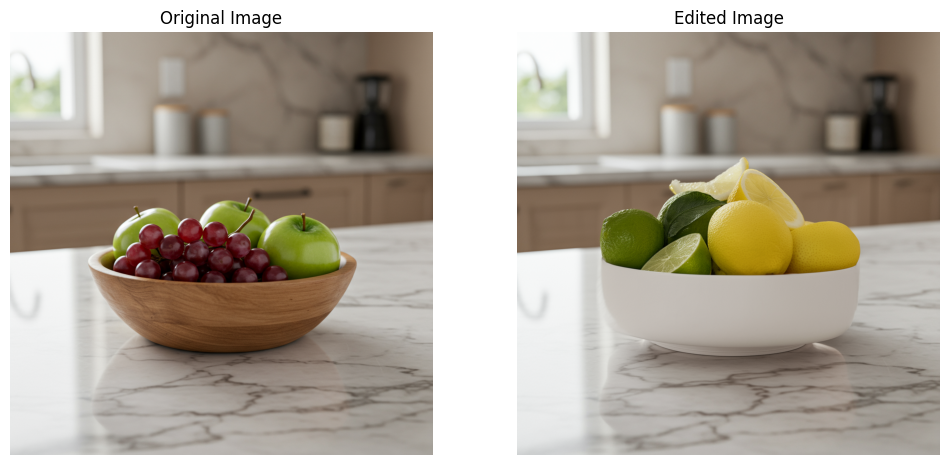

In [10]:
image_prompt = """
a small wooden bowl with grapes and apples on a marble kitchen counter, light brown cabinets blurred in the background
"""
generated_image = client.models.generate_images(
    model=generation_model,
    prompt=image_prompt,
    config=GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)






edit_prompt = "a small white ceramic bowl with lemons and limes"
# input the generated image as reference
raw_ref_image = RawReferenceImage(
    reference_image=generated_image.generated_images[0].image, reference_id=0
)

# instead of using a user-defined mask
# we ask Gemini to edit/mask the foreground
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=None,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_FOREGROUND",
        mask_dilation=0.1,
    ),
)

edited_image = client.models.edit_image(
    model=edit_model,
    prompt=edit_prompt,
    # reference the generated input img
    #           AND 'mask' img
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_INSERTION",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

# show generated img, edited img
display_images(
    generated_image.generated_images[0].image._pil_image,
    edited_image.generated_images[0].image._pil_image,
)

In [20]:
generated_image

GenerateImagesResponse(
  generated_images=[
    GeneratedImage(
      enhanced_prompt="A small, rustic wooden bowl filled with plump, ripe red grapes and a few crisp, green apples rests on a sleek, cool marble kitchen counter. The bowl's natural wood grain adds a touch of warmth to the scene, contrasting beautifully with the cool, polished surface of the counter. In the softly blurred background, light brown kitchen cabinets provide a subtle backdrop. The image is captured in a sharp, high-resolution format, highlighting the texture of the wood, the sheen of the marble, and the glossy skin of the fruit. Natural light streams in from a nearby window, illuminating the scene with soft, even light, and casting gentle shadows on the surface of the counter. The overall aesthetic of the image is minimalist and inviting, a simple portrayal of fresh, natural ingredients on a clean and modern kitchen countertop.",
      image=Image(
        image_bytes=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\

In [21]:
generated_image.generated_images[0].image

Image(
  image_bytes=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x02\x00\x00\x00\xf0\x7f\xbc\xd4\x00\x00\x00\x83zTXtRaw profile type iptc\x00\x00\x08\x99M\x8b;\x0e\xc20\x10\x05{\x9f"G\xd8\xdd\xbc\xfd\xa4\xa6\xa2\xa3\xe0\x02\xb6\xe3\x95\x90"\x05q\xff\x02...',
  mime_type='image/png'
)

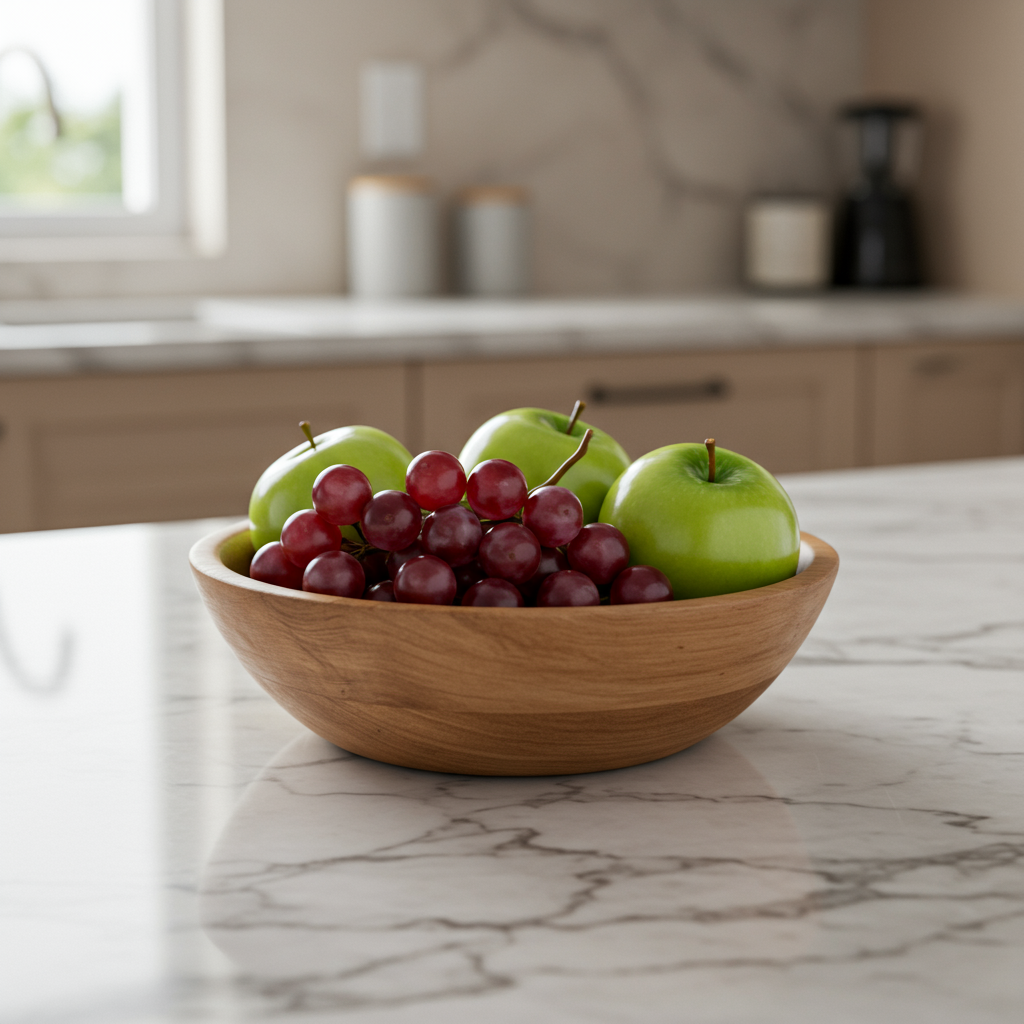

In [22]:
generated_image.generated_images[0].image._pil_image

In [18]:
generated_image

GenerateImagesResponse(
  generated_images=[
    GeneratedImage(
      enhanced_prompt="A small, rustic wooden bowl filled with plump, ripe red grapes and a few crisp, green apples rests on a sleek, cool marble kitchen counter. The bowl's natural wood grain adds a touch of warmth to the scene, contrasting beautifully with the cool, polished surface of the counter. In the softly blurred background, light brown kitchen cabinets provide a subtle backdrop. The image is captured in a sharp, high-resolution format, highlighting the texture of the wood, the sheen of the marble, and the glossy skin of the fruit. Natural light streams in from a nearby window, illuminating the scene with soft, even light, and casting gentle shadows on the surface of the counter. The overall aesthetic of the image is minimalist and inviting, a simple portrayal of fresh, natural ingredients on a clean and modern kitchen countertop.",
      image=Image(
        image_bytes=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\

In [23]:
raw_ref_image

RawReferenceImage(
  reference_id=0,
  reference_image=Image(
    image_bytes=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x02\x00\x00\x00\xf0\x7f\xbc\xd4\x00\x00\x00\x83zTXtRaw profile type iptc\x00\x00\x08\x99M\x8b;\x0e\xc20\x10\x05{\x9f"G\xd8\xdd\xbc\xfd\xa4\xa6\xa2\xa3\xe0\x02\xb6\xe3\x95\x90"\x05q\xff\x02...',
    mime_type='image/png'
  ),
  reference_type='REFERENCE_TYPE_RAW'
)

In [19]:
mask_ref_image

MaskReferenceImage(
  config=MaskReferenceConfig(
    mask_dilation=0.1,
    mask_mode=<MaskReferenceMode.MASK_MODE_FOREGROUND: 'MASK_MODE_FOREGROUND'>
  ),
  mask_image_config=MaskReferenceConfig(
    mask_dilation=0.1,
    mask_mode=<MaskReferenceMode.MASK_MODE_FOREGROUND: 'MASK_MODE_FOREGROUND'>
  ),
  reference_id=1,
  reference_type='REFERENCE_TYPE_MASK'
)

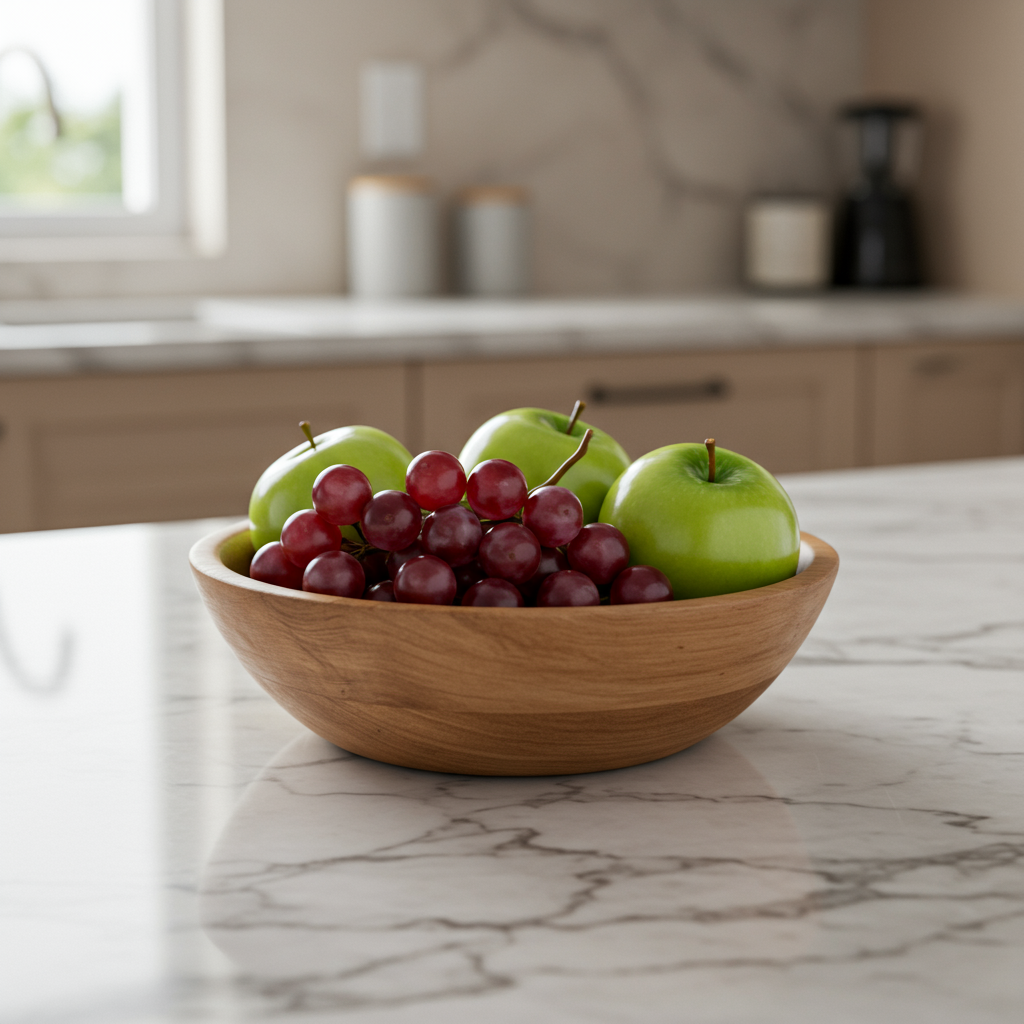

In [26]:
# show generated_image = raw_ref_image, mask_ref_image

# unable to see mask_ref_image
# display_images(
#     raw_ref_image.reference_image._pil_image,
#     generated_image.generated_images[0].image._pil_image,
#     # mask_ref_image.generated_images[0].image._pil_image,
# )

# show generated_image = raw_ref_image
raw_ref_image.reference_image._pil_image

### Inpainting Insert (edit_mode="EDIT_MODE_INPAINT_INSERTION") BUT mask_mode="MASK_MODE_SEMANTIC"

This next example demonstrates another instance of inpainting insert. However, you'll use the semantic mask mode. When using this mask mode, you'll need to specify the class ID of the object in the image that you wish to mask and replace. A list of possible instance types is shown at the end of this notebook. Once you've found the correct segmentation class ID, list it in ```segmentation_classes```.

Within the ```MaskReferenceImage``` object you can also configure the dilation value. This float between 0 and 1 represents the percentage of the provided mask.

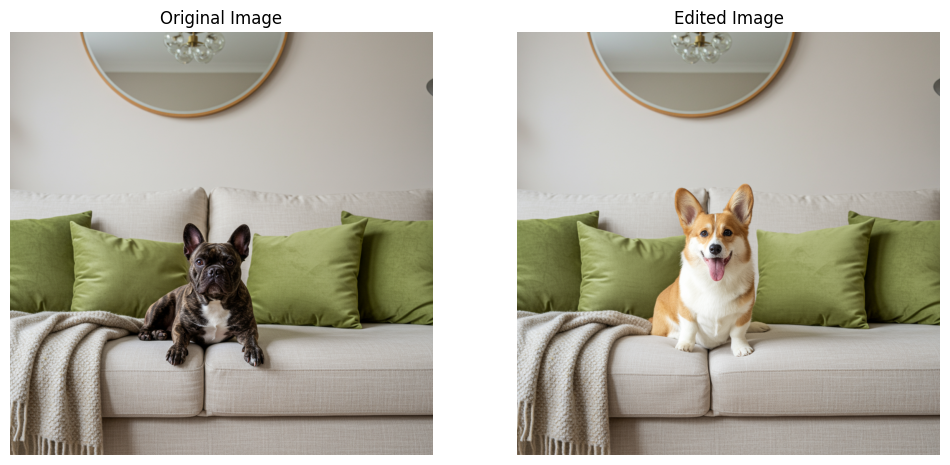

In [27]:
image_prompt = """
a french bulldog sitting in a living room on a couch with green throw pillows and a throw blanket,
a circular mirror is on the wall above the couch
"""
generated_image = client.models.generate_images(
    model=generation_model,
    prompt=image_prompt,
    config=GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

edit_prompt = "a corgi sitting on a couch"
raw_ref_image = RawReferenceImage(
    reference_image=generated_image.generated_images[0].image, reference_id=0
)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=None,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_SEMANTIC",
        segmentation_classes=[8],
        mask_dilation=0.1,
    ),
)
edited_image = client.models.edit_image(
    model=edit_model,
    prompt=edit_prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_INSERTION",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    generated_image.generated_images[0].image._pil_image,
    edited_image.generated_images[0].image._pil_image,
)

### Inpainting Insert (edit_mode="EDIT_MODE_INPAINT_INSERTION") BUT mask_mode="MASK_MODE_USER_PROVIDED"

Below you'll see another instance of inpainting insert. This time you'll use a local image and mask that have been downloaded from Google Cloud Storage. When using your own mask, you'll specify "MASK_MODE_USER_PROVIDED" as the ```mask_mode```.

Copying gs://cloud-samples-data/generative-ai/image/image-dog.png...
/ [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      
Copying gs://cloud-samples-data/generative-ai/image/image-dog-mask.png...
/ [1 files][  4.0 KiB/  4.0 KiB]                                                
Operation completed over 1 objects/4.0 KiB.                                      


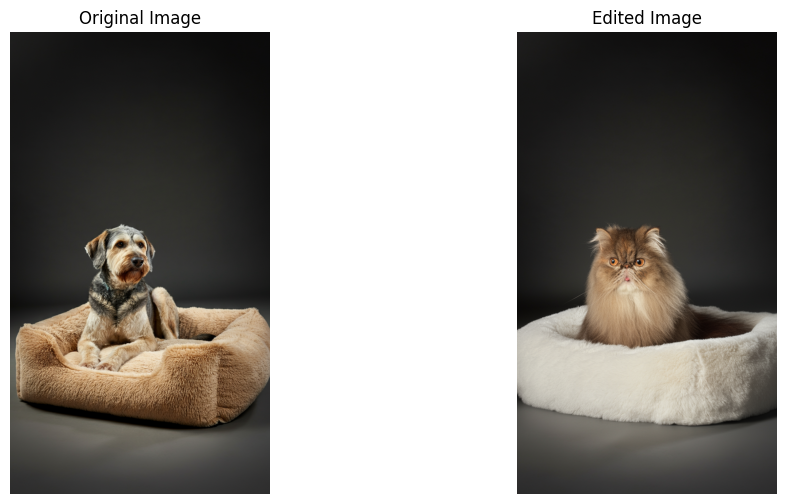

In [28]:
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog.png" .
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog-mask.png" .
initial_image = Image.from_file(location="image-dog.png")
initial_image_mask = Image.from_file(location="image-dog-mask.png")

edit_prompt = "a Persian cat sitting in a white cat bed"
raw_ref_image = RawReferenceImage(reference_image=initial_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=initial_image_mask,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_USER_PROVIDED",
        mask_dilation=0.1,
    ),
)

edited_image = client.models.edit_image(
    model=edit_model,
    prompt=edit_prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_INSERTION",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    initial_image._pil_image, edited_image.generated_images[0].image._pil_image
)

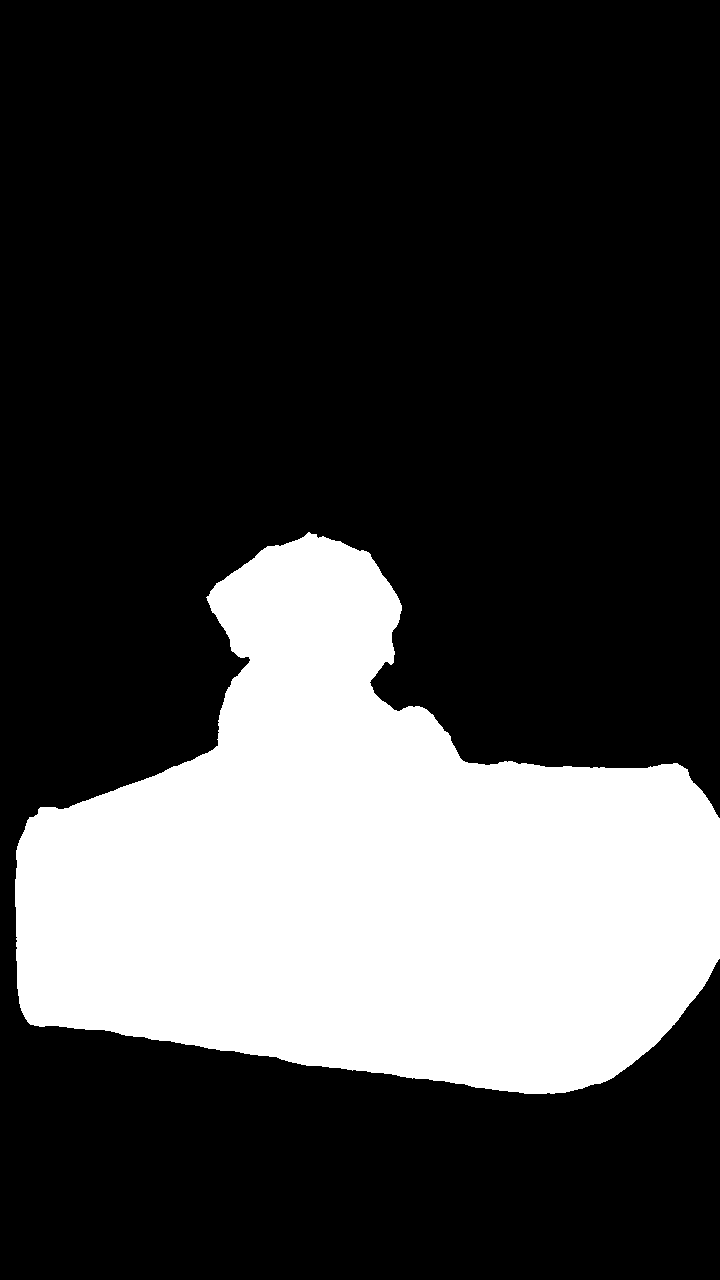

In [30]:
# MASK
initial_image_mask._pil_image

### Inpainting Insert (edit_mode="EDIT_MODE_INPAINT_INSERTION") BUT mask_mode="MASK_MODE_USER_PROVIDED" but mask_dilation > 0.1

Copying gs://cloud-samples-data/generative-ai/image/image-dog.png...
/ [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      
Copying gs://cloud-samples-data/generative-ai/image/image-dog-mask.png...
/ [1 files][  4.0 KiB/  4.0 KiB]                                                
Operation completed over 1 objects/4.0 KiB.                                      


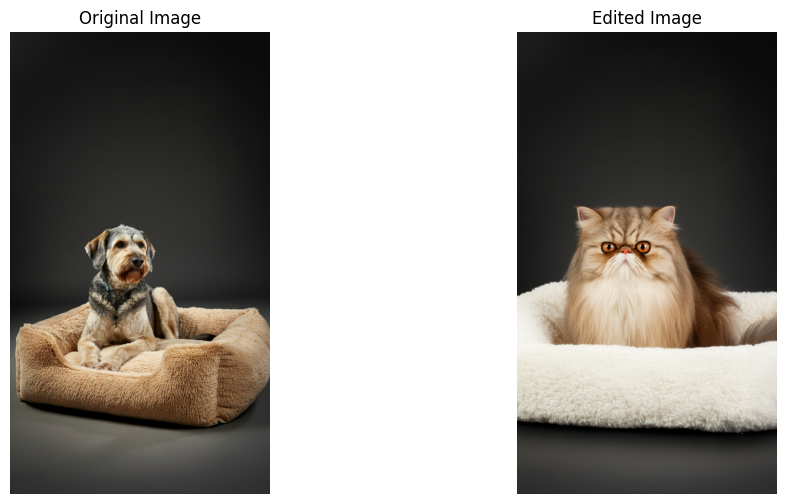

In [32]:
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog.png" .
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog-mask.png" .
initial_image = Image.from_file(location="image-dog.png")
initial_image_mask = Image.from_file(location="image-dog-mask.png")

edit_prompt = "a Persian cat sitting in a white cat bed"
raw_ref_image = RawReferenceImage(reference_image=initial_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=initial_image_mask,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_USER_PROVIDED",
        mask_dilation=0.2,
    ),
)

edited_image = client.models.edit_image(
    model=edit_model,
    prompt=edit_prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_INSERTION",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    initial_image._pil_image, edited_image.generated_images[0].image._pil_image
)

Copying gs://cloud-samples-data/generative-ai/image/image-dog.png...
/ [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      
Copying gs://cloud-samples-data/generative-ai/image/image-dog-mask.png...
/ [1 files][  4.0 KiB/  4.0 KiB]                                                
Operation completed over 1 objects/4.0 KiB.                                      


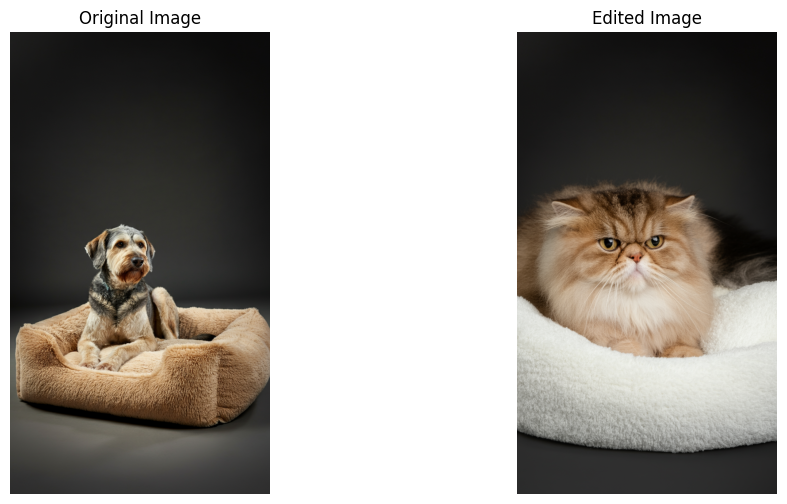

In [33]:
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog.png" .
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog-mask.png" .
initial_image = Image.from_file(location="image-dog.png")
initial_image_mask = Image.from_file(location="image-dog-mask.png")

edit_prompt = "a Persian cat sitting in a white cat bed"
raw_ref_image = RawReferenceImage(reference_image=initial_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=initial_image_mask,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_USER_PROVIDED",
        mask_dilation=0.3,
    ),
)

edited_image = client.models.edit_image(
    model=edit_model,
    prompt=edit_prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_INSERTION",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    initial_image._pil_image, edited_image.generated_images[0].image._pil_image
)

Copying gs://cloud-samples-data/generative-ai/image/image-dog.png...
/ [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      
Copying gs://cloud-samples-data/generative-ai/image/image-dog-mask.png...
/ [1 files][  4.0 KiB/  4.0 KiB]                                                
Operation completed over 1 objects/4.0 KiB.                                      


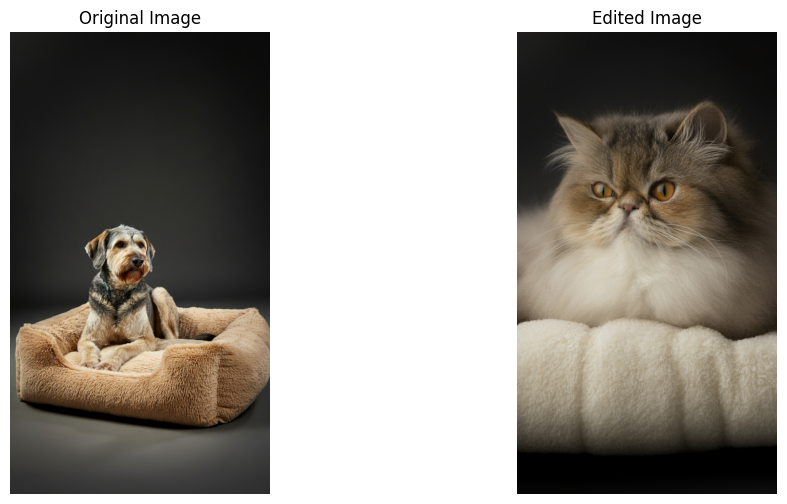

In [34]:
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog.png" .
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog-mask.png" .
initial_image = Image.from_file(location="image-dog.png")
initial_image_mask = Image.from_file(location="image-dog-mask.png")

edit_prompt = "a Persian cat sitting in a white cat bed"
raw_ref_image = RawReferenceImage(reference_image=initial_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=initial_image_mask,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_USER_PROVIDED",
        mask_dilation=0.5,
    ),
)

edited_image = client.models.edit_image(
    model=edit_model,
    prompt=edit_prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_INSERTION",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    initial_image._pil_image, edited_image.generated_images[0].image._pil_image
)

Copying gs://cloud-samples-data/generative-ai/image/image-dog.png...
/ [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      
Copying gs://cloud-samples-data/generative-ai/image/image-dog-mask.png...
/ [1 files][  4.0 KiB/  4.0 KiB]                                                
Operation completed over 1 objects/4.0 KiB.                                      


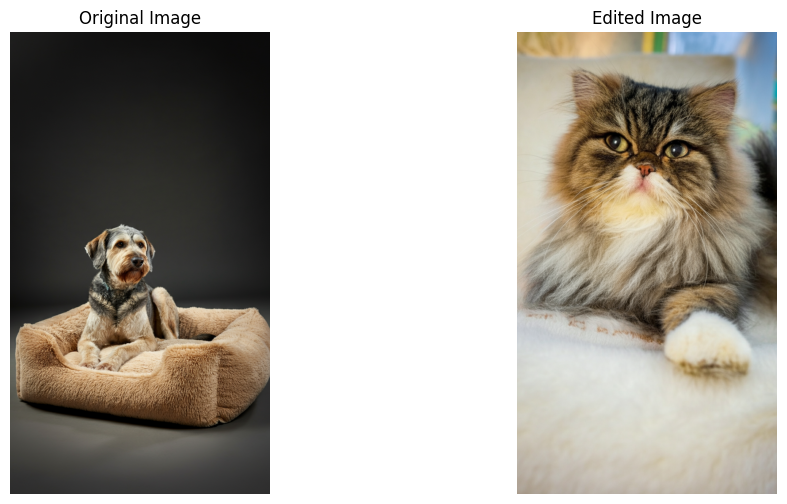

In [31]:
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog.png" .
! gsutil cp "gs://cloud-samples-data/generative-ai/image/image-dog-mask.png" .
initial_image = Image.from_file(location="image-dog.png")
initial_image_mask = Image.from_file(location="image-dog-mask.png")

edit_prompt = "a Persian cat sitting in a white cat bed"
raw_ref_image = RawReferenceImage(reference_image=initial_image, reference_id=0)
mask_ref_image = MaskReferenceImage(
    reference_id=1,
    reference_image=initial_image_mask,
    config=MaskReferenceConfig(
        mask_mode="MASK_MODE_USER_PROVIDED",
        mask_dilation=0.8,
    ),
)

edited_image = client.models.edit_image(
    model=edit_model,
    prompt=edit_prompt,
    reference_images=[raw_ref_image, mask_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_INPAINT_INSERTION",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_images(
    initial_image._pil_image, edited_image.generated_images[0].image._pil_image
)